In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
c = pd.read_csv(r"C:\Users\Chinenye Claire\Downloads\energydata_complete.csv")

In [3]:
c.shape

(19735, 29)

In [4]:
column_names = {'T1':'Temperature in kitchen area', 'T2': 'Temperature in living room area', 
                'T3':  'Temperature in laundry room area', 'T4': 'Temperature in office room', 'T5': 'Temperature in bathroom',
                'T6': 'Temperature outside the building (north side)', 'T7': 'Temperature in ironing room', 
                'T8': 'Temperature in teenager room 2', 
                'T9': 'Temperature in parents room', 'To': 'Temperature outside (from Chievres weather station)', 'RH_1': 'Humidity in kitchen area', 'RH_2': 'Humidity in living room area', 'RH_3': 'Humidity in laundry room area', 'RH_4': 'Humidity in office room', 'RH_5': ' Humidity in bathroom', 'RH_6': 'Humidity outside the building (north side)', 'RH_7': 'Humidity in ironing room', 'RH_8': 'Humidity in teenager room 2', 'RH_9': 'Humidity in parents room', 'RH_out': 'Humidity outside (from Chievres weather station)'}

In [5]:
df = c.rename(columns=column_names)

In [6]:
#Select a sample of the dataset
simple_linear_reg_df = df[['Temperature in living room area', 'Temperature outside the building (north side)']].sample(15, random_state=2)

In [7]:
simple_linear_reg_df

,Temperature in living room area,Temperature outside the building (north side)
1117,17.426667,-4.238889
16275,22.760000,14.690000
13272,21.230000,8.926667
3160,21.100000,7.690000
19210,21.856667,10.800000
8260,17.356667,5.000000
12299,19.000000,5.300000
13505,22.700000,17.133333
12913,19.593333,7.545000
17788,21.890000,9.190000


<Axes: xlabel='Temperature in living room area', ylabel='Temperature outside the building (north side)'>

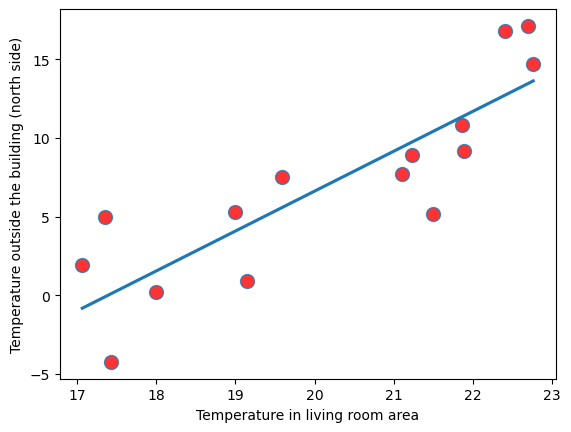

In [8]:
sns.regplot(x="Temperature in living room area", y="Temperature outside the building (north side)",data=simple_linear_reg_df, ci=None, scatter_kws={'s':100, 'facecolor':'red'})

In [9]:
x= np.array(simple_linear_reg_df['Temperature in living room area'])
y = np.array(simple_linear_reg_df['Temperature outside the building (north side)'])

In [10]:
x = x.reshape(-1, 1) #feature matrix
y = y.reshape(-1, 1) #response vector

In [11]:
#Now, we split our dataset into the training and testing dataset. Recall that we had earlier segmented the features and target variables.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(10, 1)
(5, 1)
(10, 1)
(5, 1)


In [14]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train, y_train)
#obtain predictions
y_pred = linear_model.predict(x_test)
y_pred_train = linear_model.predict(x_train)

In [13]:
#Q17 What is the ROOT MEAN SQUARED ERROR for the Linear model in three D.P.?
from sklearn.metrics import  mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
round(rmse, 3)

3.737

In [16]:
df1 = df.drop(columns=['date', 'lights'])

In [17]:
#Normalise our dataset to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#Apply scale to data to create normalised DF
normalised_df = pd.DataFrame(scaler.fit_transform(df1), columns=df1.columns)
#select features/Independent variables
X = normalised_df.drop(columns=['Appliances'])
#select target variable (dependent variables)
Y = normalised_df['Appliances']

In [23]:
#Now, we split our dataset into the training and testing dataset. Recall that we had earlier segmented the features and target variables.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train,Y_test = train_test_split(X, Y,test_size=0.3, random_state=42)

In [19]:
#Run a multiple linear regression using the training set
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(X_train, Y_train)
#obtain predictions
predicted_values_train = linear_model.predict(X_train)
predicted_values_test = linear_model.predict(X_test)

In [20]:
#Q18 What is the Mean Absolute Error (in three decimal places) for the  training set?
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_train, predicted_values_train)
round(mae, 3)

0.05

In [21]:
#Q19 What is the Root Mean Square Error (in three decimal places) for the  training set?
from sklearn.metrics import  mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_train, predicted_values_train))
round(rmse, 3)

0.089

In [24]:
#Q20 What is the Mean Absolute Error (in three decimal places) for the testing set?
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_test, predicted_values_test)
round(mae, 3)

0.05

In [25]:
#Q21 What is the Root Mean Square Error (in three decimal places) for the  testing set?
from sklearn.metrics import  mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, predicted_values_test))
round(rmse, 3)

0.088

In [ ]:
#Q22 Did the Model above overfit to the training set
Yes, there is overfitting because there is very little difference between train and test RMSE

In [28]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(X_train, Y_train)   # Fit a ridge regression on the training data

Ridge(alpha=0.5)

In [30]:
pred2 = ridge_reg.predict(X_test)
print(pd.Series(ridge_reg.coef_, index = X.columns)) # Print coefficients

Temperature in kitchen area                        -0.021549
Humidity in kitchen area                            0.511932
Temperature in living room area                    -0.193880
Humidity in living room area                       -0.401134
Temperature in laundry room area                    0.287408
Humidity in laundry room area                       0.094976
Temperature in office room                          0.027006
Humidity in office room                             0.024168
Temperature in bathroom                            -0.020727
 Humidity in bathroom                               0.016176
Temperature outside the building (north side)       0.213316
Humidity outside the building (north side)          0.035023
Temperature in ironing room                         0.010021
Humidity in ironing room                           -0.046291
Temperature in teenager room 2                      0.100754
Humidity in teenager room 2                        -0.156596
Temperature in parents r

In [32]:
print(np.sqrt(mean_squared_error(Y_test, pred2)))         #Calculate the test RMSE

0.08754118590838059


In [ ]:
#Q23 Train a ridge regression model with default parameters. Is there any change to the root mean squared error (RMSE) when evaluated on the test set?
There is no significant change in RMSE.

In [55]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, Y_train)

Lasso(alpha=0.001)

In [37]:
#this function returns the weight of every feature
def get_weights_df(model, feat, col_name):
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df

In [56]:
lasso_weights_df = get_weights_df(lasso_reg, X_train, 'Lasso_weight')
lasso_weights_df

,Features,Lasso_weight
0,Humidity outside (from Chievres weather station),-0.049557
1,Humidity in teenager room 2,-0.000110
2,Temperature in kitchen area,0.000000
3,Tdewpoint,0.000000
4,Visibility,0.000000
5,Press_mm_hg,-0.000000
6,T_out,0.000000
7,Humidity in parents room,-0.000000
8,Temperature in parents room,-0.000000
9,Temperature in teenager room 2,0.000000


In [ ]:
#Q24 Train a lasso regression model with default value and obtain the new feature weights with it. How many of the features have non-zero feature weights?
Answer: 3

In [48]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000)
lassocv.fit(X_train, Y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, Y_train)
np.sqrt(mean_squared_error(Y_test, lasso.predict(X_test)))  # Calculate the test RMSE

0.08751635779581003

In [ ]:
#Q25 What is the new RMSE with the Lasso Regression on the test set?
Answer: 0.088